Summary table:
   N   Bad algo  semi cache-friendly algo  cache-frinedly algo  Parallel  block-parallel
  10   0.000025                  0.000020             0.000022  0.001442        0.000215
  50   0.002728                  0.002173             0.002488  0.001181        0.001114
 100   0.010853                  0.007357             0.005555  0.001311        0.002828
 200   0.052412                  0.037258             0.039746  0.008044        0.012261
 300   0.164027                  0.113243             0.112020  0.024384        0.031747
 500   0.732967                  0.598818             0.530806  0.107331        0.104884
2000 101.996354                 82.308359            34.160692  6.700380        7.111959


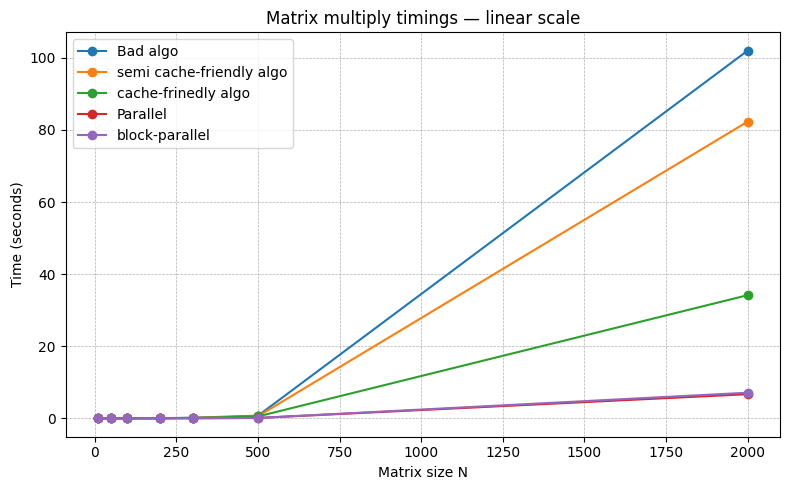

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_times(N, T1, T2, T3, T4, T5, labels=("T1","T2","T3","T4","T5"), title_prefix="Matrix multiply timings",
               save_prefix=None, show_legend=True, marker='o'):
    N = np.asarray(N)
    T1 = np.asarray(T1)
    T2 = np.asarray(T2)
    T3 = np.asarray(T3)
    T4 = np.asarray(T4)
    T5 = np.asarray(T5)
    if not (len(N) == len(T1) == len(T2) == len(T3)):
        raise ValueError("All input arrays must have the same length. Got lengths: {},{},{},{}".format(len(N), len(T1), len(T2), len(T3)))
    df = pd.DataFrame({
        "N": N,
        labels[0]: T1,
        labels[1]: T2,
        labels[2]: T3,
        labels[3]: T4,
        labels[4]: T5,
    }).sort_values("N").reset_index(drop=True)

    fig1, ax1 = plt.subplots(figsize=(8,5))
    ax1.plot(df["N"], df[labels[0]], marker=marker, label=labels[0])
    ax1.plot(df["N"], df[labels[1]], marker=marker, label=labels[1])
    ax1.plot(df["N"], df[labels[2]], marker=marker, label=labels[2])
    ax1.plot(df["N"], df[labels[3]], marker=marker, label=labels[3])
    ax1.plot(df["N"], df[labels[4]], marker=marker, label=labels[4])
    ax1.set_xlabel("Matrix size N")
    ax1.set_ylabel("Time (seconds)")
    ax1.set_title(f"{title_prefix} — linear scale")
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
    if show_legend:
        ax1.legend()
    if save_prefix:
        fig1.tight_layout()
        fig1.savefig(f"{save_prefix}_linear.png", dpi=200)

    return fig1, df

# Demo data
N = np.array([10, 50, 100, 200, 300, 500, 2000])
T1 = np.array([0.000025, 0.002728, 0.010853, 0.052412, 0.164027, 0.732967, 101.996354])
T2 = np.array([0.000020, 0.002173, 0.007357, 0.037258, 0.113243, 0.598818, 82.308359])
T3 = np.array([0.000022, 0.002488, 0.005555, 0.039746, 0.112020, 0.530806, 34.160692])
T4 = np.array([0.001442, 0.001181, 0.001311, 0.008044, 0.024384, 0.107331, 6.700380])
T5 = np.array([0.000215, 0.001114, 0.002828, 0.012261, 0.031747, 0.104884, 7.111959])

fig_linear, df = plot_times(N, T1, T2, T3, T4, T5, labels=("Bad algo", "semi cache-friendly algo", "cache-frinedly algo", "Parallel", "block-parallel"), save_prefix="matrix_timings_demo")

print("Summary table:")
print(df.to_string(index=False))

# Correct way to show plots
plt.show()

Summary table:
   N      n==1      n==2     n==4     n==8    n==16    n==32    n==64   n==256  n==1024  n==4096
  10  0.000018  0.000543 0.000445 0.000829 0.000869 0.001092 0.000932 0.001027 0.001247 0.001464
  50  0.002595  0.000859 0.000785 0.000901 0.001232 0.002095 0.003779 0.002529 0.001559 0.001393
 100  0.006449  0.003268 0.003108 0.001911 0.001380 0.001626 0.001890 0.003621 0.005922 0.002799
 200  0.033297  0.015595 0.008884 0.011465 0.008125 0.009223 0.009159 0.011094 0.011071 0.011313
 500  0.439687  0.202961 0.103386 0.106455 0.103011 0.101344 0.099843 0.102128 0.104499 0.106974
1000  3.231917  1.785390 0.831689 0.896442 1.013180 0.897000 0.889565 0.850839 0.988887 0.878960
2000 26.027637 13.170507 7.052845 7.644071 7.345827 7.248725 7.227384 7.250475 7.176968 7.302571


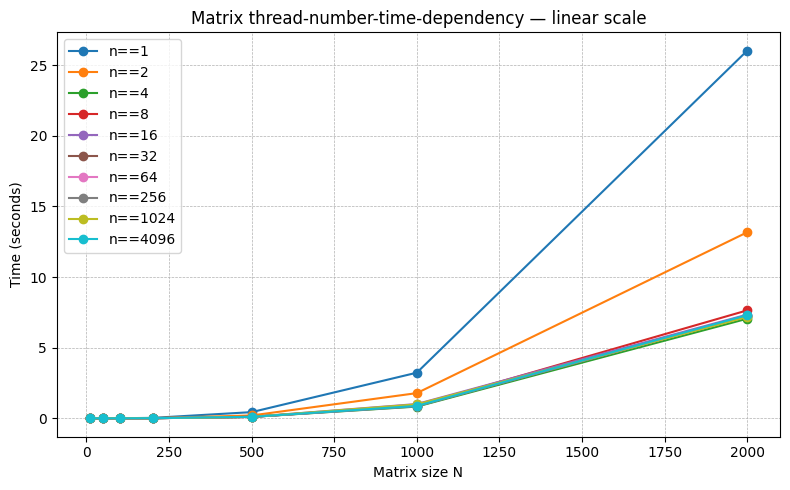

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_times(N, T1, T2, T3, T4, T5, T6, T7, T8, T9, T10, labels=("T1","T2","T3","T4","T5","T6","T7","T8","T9","T10"), title_prefix="Matrix thread-number-time-dependency",
               save_prefix=None, show_legend=True, marker='o'):
    N = np.asarray(N)
    T1 = np.asarray(T1)
    T2 = np.asarray(T2)
    T3 = np.asarray(T3)
    T4 = np.asarray(T4)
    T5 = np.asarray(T5)
    T6 = np.asarray(T6)
    T7 = np.asarray(T7)
    T8 = np.asarray(T8)
    T9 = np.asarray(T9)
    T10 = np.asarray(T10)
    if not (len(N) == len(T1) == len(T2) == len(T3)):
        raise ValueError("All input arrays must have the same length. Got lengths: {},{},{},{}".format(len(N), len(T1), len(T2), len(T3)))
    df = pd.DataFrame({
        "N": N,
        labels[0]: T1,
        labels[1]: T2,
        labels[2]: T3,
        labels[3]: T4,
        labels[4]: T5,
        labels[5]: T6,
        labels[6]: T7,
        labels[7]: T8,
        labels[8]: T9,
        labels[9]: T10,
    }).sort_values("N").reset_index(drop=True)

    fig1, ax1 = plt.subplots(figsize=(8,5))
    ax1.plot(df["N"], df[labels[0]], marker=marker, label=labels[0])
    ax1.plot(df["N"], df[labels[1]], marker=marker, label=labels[1])
    ax1.plot(df["N"], df[labels[2]], marker=marker, label=labels[2])
    ax1.plot(df["N"], df[labels[3]], marker=marker, label=labels[3])
    ax1.plot(df["N"], df[labels[4]], marker=marker, label=labels[4])
    ax1.plot(df["N"], df[labels[5]], marker=marker, label=labels[5])
    ax1.plot(df["N"], df[labels[6]], marker=marker, label=labels[6])
    ax1.plot(df["N"], df[labels[7]], marker=marker, label=labels[7])
    ax1.plot(df["N"], df[labels[8]], marker=marker, label=labels[8])
    ax1.plot(df["N"], df[labels[9]], marker=marker, label=labels[9])
    ax1.set_xlabel("Matrix size N")
    ax1.set_ylabel("Time (seconds)")
    ax1.set_title(f"{title_prefix} — linear scale")
    ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
    if show_legend:
        ax1.legend()
    if save_prefix:
        fig1.tight_layout()
        fig1.savefig(f"{save_prefix}_linear.png", dpi=200)

    return fig1, df

# Demo data
N = np.array([10, 50, 100, 200, 500, 1000, 2000])
T1 = np.array([0.000018, 0.002595, 0.006449, 0.033297, 0.439687, 3.231917, 26.027637])
T2 = np.array([0.000543, 0.000859, 0.003268, 0.015595, 0.202961, 1.785390, 13.170507])
T3 = np.array([0.000445, 0.000785, 0.003108, 0.008884, 0.103386, 0.831689, 7.052845])
T4 = np.array([0.000829, 0.000901, 0.001911, 0.011465, 0.106455, 0.896442, 7.644071])
T5 = np.array([0.000869, 0.001232, 0.001380, 0.008125, 0.103011, 1.013180, 7.345827])
T6 = np.array([0.001092, 0.002095, 0.001626, 0.009223, 0.101344, 0.897000, 7.248725])
T7 = np.array([0.000932, 0.003779, 0.001890, 0.009159, 0.099843, 0.889565, 7.227384])
T8 = np.array([0.001027, 0.002529, 0.003621, 0.011094, 0.102128, 0.850839, 7.250475])
T9 = np.array([0.001247, 0.001559, 0.005922, 0.011071, 0.104499, 0.988887, 7.176968])
T10 = np.array([0.001464, 0.001393, 0.002799, 0.011313, 0.106974, 0.878960, 7.302571])

fig_linear, df = plot_times(N, T1, T2, T3, T4, T5, T6, T7, T8, T9, T10, labels=("n==1", "n==2", "n==4", "n==8", "n==16", "n==32" , "n==64" ,"n==256","n==1024","n==4096"), save_prefix="matrix_timings_demo")

print("Summary table:")
print(df.to_string(index=False))

# Correct way to show plots
plt.show()